In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
data=pd.read_csv('C:/Users/asdw/Downloads/Indicators.csv',sep=',')
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [2]:
data.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [3]:
data.index

RangeIndex(start=0, stop=5656458, step=1)

In [4]:
data.shape

(5656458, 6)

In [5]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


## how many UNIQUE country name are there

In [6]:
countries=data['CountryName'].unique().tolist()#tolist convert data into list
len(countries)

247

### are there same country codes?

In [7]:
countryCode=data['CountryCode'].unique().tolist()#tolist convert data into list
len(countryCode)

247

### are there many indicators or few?

In [8]:
indicators=data['IndicatorName'].unique().tolist()#tolist convert data into list
len(indicators)

1344

### how many years of data we have

In [9]:
years=data['Year'].unique().tolist()#tolist convert data into list
len(years)

56

### whats the range of year

In [10]:
print(str(min(years))+" to "+str(max(years)))

1960 to 2015


# MATPLOTLIB BASICS PLOTING PART 1

###  Lets pick a country and an indicator to explore:co2 emissionper capita and the USA

In [11]:
hist_indicator='CO2 emissions \(metric'
hist_country='USA'

mask1=data['IndicatorName'].str.contains(hist_indicator)
mask2=data['CountryCode'].str.contains(hist_country)
stage=data[mask1 & mask2]

In [12]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


## lets see how emission change overtime using matplotlib

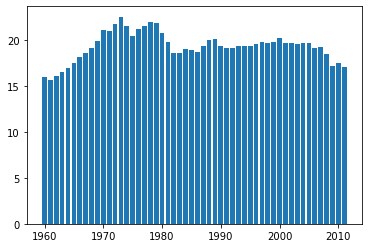

In [13]:
#get the years
years=stage['Year'].values
#get the values
co2=stage['Value'].values
# create
plt.bar(years,co2)
plt.show()

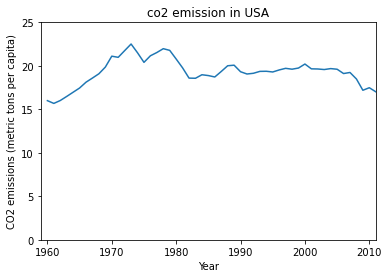

In [14]:
#switch to a line plot
plt.plot(stage['Year'].values,stage['Value'].values)
#label the axis
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])
# label the figure 
plt.title('co2 emission in USA')
#to make more honest start the y axis at 0
plt.axis([1959,2011,0,25])
plt.show()

In [15]:
#otherwise lets look at all data
hist_data=stage['Value'].values

In [16]:
print(len(hist_data))

52


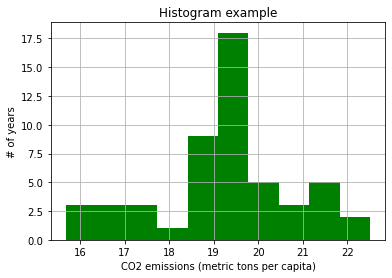

In [17]:
plt.hist(hist_data,10,density=False,facecolor='green')
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of years')
plt.title('Histogram example')

plt.grid(True)
plt.show()

#### how do the USA numbers relate to other countries

In [18]:
hist_indicator='CO2 emisssion \(metric'
hist_year=2011

mask=data['IndicatorName'].str.contains(hist_indicator)
mask2=data['Year'].isin([hist_year])# to check integer values in dataframe use

#apply our mask
co2_2011=data[mask1& mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


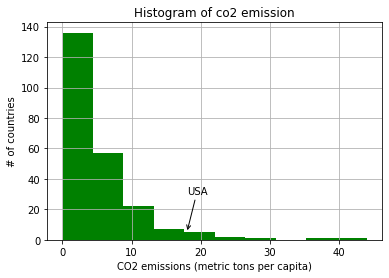

In [19]:
#subplot returns a touple wiyh the figure ,axis attributes
fig, ax=plt.subplots()
ax.annotate("USA",
            xy=(18,5),xycoords='data',
            xytext=(18,30), textcoords='data',
            arrowprops=dict(arrowstyle='->',
                           connectionstyle='arc3'))
plt.hist(co2_2011['Value'],10,density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel("# of countries")
plt.title("Histogram of co2 emission")
#plt.axis([10,22,0,14])
plt.grid(True)
plt.show()

### part2 relationship betwwen GDP and co2 emission in USA

In [20]:
hist_indicator =('GDP per capita \(constant 2005')
hist_country='USA'

mask1=data['IndicatorName'].str.contains(hist_indicator)
mask2=data['CountryCode'].str.contains(hist_country)

#stage is just those indicator matching the usa for country code and co2 emissin over time
gdp_stage=data[mask1 & mask2]




In [21]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


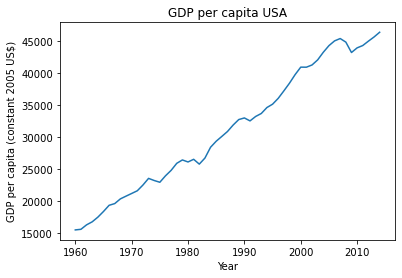

In [22]:
#switch to line plot 
plt.plot(gdp_stage['Year'].values,gdp_stage['Value'].values)

#label the axis
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP per capita USA')
#to make more honest ,start the y axis at 0
#plt.axis([1959,2011,0,25])
plt.show()

In [23]:
# scaytter for comparing gdp against c02 emisson (per capita)

In [24]:
#first we'will need to make sure the same time frames
print('GDP Min Year=',gdp_stage['Year'].min(),"Max:",gdp_stage['Year'].max())
print('CO2 Min Year=',stage['Year'].min(),"Max:",stage['Year'].max())

GDP Min Year= 1960 Max: 2014
CO2 Min Year= 1960 Max: 2011


##### we have 3 extra year of gdp data ,so lets trim those off so the scattered has equal length array to compare it is reqired scatterplot()

In [25]:
gdp_stagetrunc=gdp_stage[gdp_stage['Year']<2012]
print(len(gdp_stagetrunc))
print(len(stage))

52
52


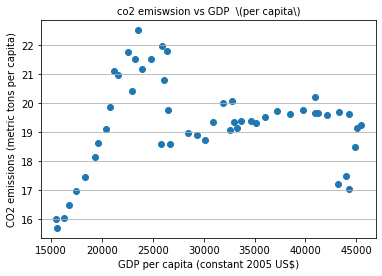

In [28]:
fig ,axis=plt.subplots()
#grid lines ,xticks, xlabels, ylabel

axis.yaxis.grid(True)
axis.set_title("co2 emiswsion vs GDP  \(per capita\)" , fontsize=10)
axis.set_xlabel(gdp_stagetrunc['IndicatorName'].iloc[0], fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

x=gdp_stagetrunc['Value']
y=stage['Value']

axis.scatter(x,y)
plt.show()

In [27]:
np.corrcoef(gdp_stagetrunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])